In [1]:
import os
import torch
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

In [2]:
def plot_images(images):
    plt.figure(figsize=(32, 32))
    plt.imshow(torch.cat([
        torch.cat([i for i in images.cpu()], dim=-1),
    ], dim=-2).permute(1, 2, 0).cpu())
    plt.show()


def save_images(images, path, **kwargs):
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    im.save(path)

In [3]:
from ddpm import *

In [4]:
model = UNet(hidden=16).to('cuda')

In [12]:
diffusion = Diffusion()
test_sample = diffusion.sample(model, 64)

10:38:52 - INFO: Sampling 64 new images....
999it [03:14,  5.13it/s]


In [13]:
test_sample.shape

torch.Size([64, 3, 256, 256])

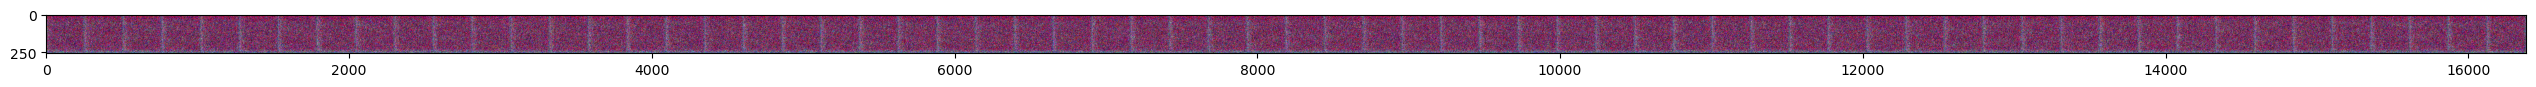

In [14]:
plot_images(test_sample)

In [15]:
def test(images, **kwargs):
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    return ndarr

In [16]:
test_grid = test(test_sample)

In [17]:
test_grid.shape

(2066, 2066, 3)

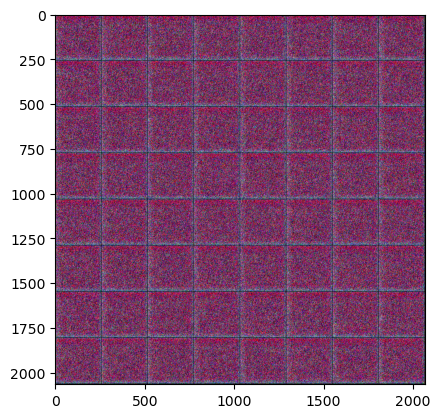

In [18]:
plt.imshow(test_grid)
plt.show()